# Text Classification Challenge

## Overview

Welcome to the Text Classification Challenge! In this task, you will develop a machine learning model to classify IMDb movie reviews into positive or negative sentiments. The challenge is designed to help you demonstrate your skills in natural language processing (NLP) and your ability to work with state-of-the-art transformer models.

### Problem Statement

The task is to build a text classification model that accurately predicts whether a given movie review expresses a positive or negative sentiment. Sentiment analysis is a critical task in NLP with applications in marketing, customer feedback, social media monitoring, and more. Accurately classifying sentiments can provide valuable insights into customer opinions and help businesses make data-driven decisions.

### Why This Task is Important

Understanding customer sentiment through text data is crucial for businesses and organizations to respond effectively to customer needs and preferences. By automating the sentiment analysis process, companies can efficiently analyze vast amounts of data, identify trends, and make informed strategic decisions. For this challenge, we will use the IMDb dataset, a widely-used benchmark in sentiment analysis, to train and evaluate our model.

## Dataset Description

The dataset used for this challenge is the IMDb movie reviews dataset, which contains 50,000 reviews labeled as either positive or negative. This dataset is balanced, with an equal number of positive and negative reviews, making it ideal for training and evaluating sentiment analysis models.

- **Columns:**
  - `review`: The text of the movie review.
  - `sentiment`: The sentiment label (`positive` or `negative`).

The IMDb dataset provides a real-world scenario where understanding sentiment can offer insights into public opinion about movies, directors, and actors, as well as broader trends in the entertainment industry.

## Approach

Transformers have revolutionized NLP by allowing models to consider the context of a word based on surrounding words, enabling better understanding and performance on various tasks, including sentiment analysis. Their ability to transfer learning from massive datasets and adapt to specific tasks makes them highly effective for text classification.

## Your Task

You are required to implement a transformer-based model for sentiment classification on the IMDb dataset. Follow the steps below to complete the challenge:

1. **Data Exploration and Preprocessing:**
   - Load the dataset and perform exploratory data analysis (EDA) to understand its structure.
   - Preprocess the data by cleaning text, encoding labels, and splitting into training and test sets.

2. **Model Implementation:**
   - Implement a transformer-based model for sentiment classification. You should consider writing Transformer blocks from scratch.
   - Implement data loaders and training loops using a deep learning framework like PyTorch or TensorFlow.

3. **Training and Evaluation:**
   - Train your model and optimize hyperparameters for the best performance.
   - Evaluate the model using appropriate metrics.

4. **Documentation:**
   - Document your approach, experiments, and results.
   - Discuss any challenges faced and propose potential improvements.

5. **Prediction and Inference:**
    - Implement a function that takes a movie review as input and predicts the sentiment (positive or negative).
    - Test the function with custom reviews and display the predicted sentiment.

6. **Model Deployment:**
    - Save the trained model and any other necessary files.
    - Prepare the model for deployment (e.g., using Flask or FastAPI).
    - Prepare a basic front-end interface for the deployed model.

7. **Submission:**
    - Create a GitHub repository for your code.
    - Write a detailed README.md file with instructions on how to train, evaluate, and use the model.
    - Include a summary of your approach and the results in the README file.
    - Your code should be well-documented and reproducible.
    - Your repository should include a notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
    - Apart from the notebook, you should also have all the codes in .py files so that it can be easily integrated with the API.
    - You submission should also include a python script for the API.
    - Your submission should also include a basic front-end for the deployed model.
    - Submit the GitHub repository link.

## Getting Started

To get started, follow the structure provided in this notebook, complete each step, and explore additional techniques to enhance your model's performance. Make sure to document your findings and prepare a comprehensive report on your work.

Good luck, and welcome to RealAI!


# Data Exploration and Preprocessing

Let's start by loading the dataset and performing some exploratory data analysis (EDA) to understand its structure and characteristics.
You can download the dataset from the following link: https://drive.google.com/file/d/1aU7Vv7jgodZ0YFOLY7kmSjrPcDDwtRfU/view?usp=sharing

You should provide all the necessary reasoning and code to support your findings.

Finally, you should apply the required preprocessing steps to prepare the data for training the sentiment classification model.

In [4]:
import pandas as pd

file_path = 'D:\Text Classification\IMDB Dataset.csv'
df = pd.read_csv(file_path)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                   

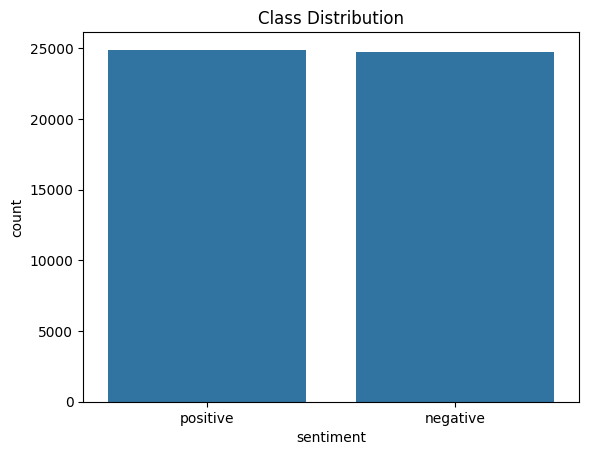

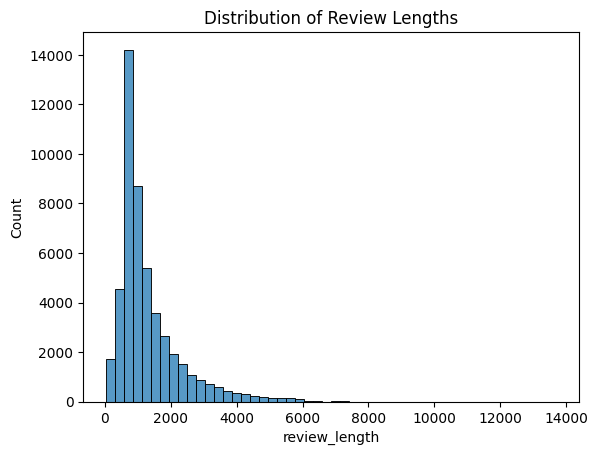

Average review length: 1310.5682304061959
sentiment
positive    24884
negative    24698
Name: count, dtype: int64
  sentiment  sentiment_encoded
0  positive                  1
1  positive                  1
2  positive                  1
3  negative                  0
4  positive                  1
sentiment
positive    24884
negative    24698
Name: count, dtype: int64
Training samples: 39665, Testing samples: 9917


In [5]:
# CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"D:\Text Classification\IMDB Dataset.csv")
print(df.head()) # Displaying the first 5 rows to check the data available

print(df.info()) # checks data types and null values.

print(df.describe()) # shows stats (for numeric columns)

print(df.isnull().sum()) #check missing values and return the number of missing values 

df = df.dropna() # any row having missing value we can drop it

#Checking duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

#Checking Class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution")
plt.show()

#Checking text Length
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()
print("Average review length:", df['review_length'].mean())

#Check for unique values in sentiment(Ensures there are only expected labels (positive, negative).)
print(df['sentiment'].value_counts())


#Encoding (the sentiment as it is categorical textual data we can encode into binary using labelEncoder)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode sentiment column
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Check encoding
print(df[['sentiment', 'sentiment_encoded']].head())

#Splitting into training and Splitting
from sklearn.model_selection import train_test_split

# Features and labels
X = df['review']                # text data
y = df['sentiment_encoded']     # encoded labels

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(df['sentiment'].value_counts())

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


# Model Implementation

You are required to implement a transformer-based model for sentiment classification from scratch. You can use libraries like PyTorch or TensorFlow to implement the model architecture and training process.

You should include the architecture figure of the proposed model and provide a detailed explanation of why you chose this architecture.

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import math
from model_def import tokenize, build_vocab
from model_def import  TransformerClassifier
# -------------------------------
# Dataset Class
# -------------------------------
class IMDBDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len=200):
        # Convert to list to avoid pandas indexing issues
        self.texts = list(texts)
        self.labels = list(labels)
        self.vocab = vocab
        self.max_len = max_len
        
    def encode(self, text):
        tokens = tokenize(text)
        ids = [self.vocab.get(token, self.vocab["<UNK>"]) for token in tokens]
        ids = ids[:self.max_len]
        ids += [self.vocab["<PAD>"]] * (self.max_len - len(ids))
        return torch.tensor(ids)
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        return self.encode(self.texts[idx]), torch.tensor(self.labels[idx])

# -------------------------------
# Transformer Components
# -------------------------------

# -------------------------------
# Prepare Data
# -------------------------------
# Convert X_train and y_train to list to avoid KeyError
X_train = X_train.tolist()
y_train = y_train.tolist()

vocab = build_vocab(X_train, max_vocab=20000)

train_dataset = IMDBDataset(
    texts=X_train,
    labels=y_train,
    vocab=vocab,
    max_len=200
)

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

print("Vocab and train_loader successfully created!")

# -------------------------------
# Device, Model, Optimizer
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerClassifier(
    vocab_size=len(vocab),
    d_model=128,
    num_heads=4,
    hidden_dim=256,
    num_layers=2,
    num_classes=2
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# -------------------------------
# Training Loop
# -------------------------------
#epochs = 5
#
#for epoch in range(epochs):
#    model.train()
#    total_loss = 0
#    
#    for inputs, labels in train_loader:
#        inputs, labels = inputs.to(device), labels.to(device)
#        optimizer.zero_grad()
#        outputs = model(inputs)
#        loss = criterion(outputs, labels)
#        loss.backward()
#        optimizer.step()
#        total_loss += loss.item()
#    
#    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
#
#print("Training complete!")

Vocab and train_loader successfully created!


# Training and Evaluation

Train your sentiment classification model on the preprocessed data. You should experiment with different hyperparameters and training configurations to achieve the best performance.

Evaluate your model using appropriate metrics and provide an analysis of the results.

In [7]:
# CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
configs = [
    {"d_model":128, "num_heads":4, "hidden_dim":256, "lr":1e-4},
    {"d_model":256, "num_heads":4, "hidden_dim":512, "lr":1e-4},
    {"d_model":128, "num_heads":8, "hidden_dim":256, "lr":3e-4},
]


results = []
best_f1 = 0
best_model_state = None

train_dataset = IMDBDataset(
    texts=X,
    labels=y,
    vocab=vocab,
    max_len=200
)

val_dataset = IMDBDataset(
    texts=X_test,
    labels=y_test,
    vocab=vocab,
    max_len=200
)
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, dataloader, criterion, device):
    model.eval()
    
    total_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_loss = total_loss / len(dataloader)

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    return avg_loss, acc, precision, recall, f1, all_labels, all_preds

for i, config in enumerate(configs):
    print(f"\n==============================")
    print(f"Training Configuration {i+1}: {config}")
    print(f"==============================")

    model = TransformerClassifier(
        vocab_size=len(vocab),
        d_model=config["d_model"],
        num_heads=config["num_heads"],
        hidden_dim=config["hidden_dim"],
        num_layers=2,
        num_classes=2
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    criterion = nn.CrossEntropyLoss()

    epochs = 3   # keep small for tuning

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}")
    


    # Validation
    val_loss, acc, precision, recall, f1, all_labels, all_preds = evaluate(
        model, val_loader, criterion, device
    )

    print(f"Validation F1: {f1:.4f}")

    results.append({
        "Config": config,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    })

    if f1 > best_f1:
        best_f1 = f1
        best_model_state = model.state_dict()

# Save best model
torch.save(best_model_state, "best_transformer_model.pth")
print("\nBest model saved!")

results_df = pd.DataFrame(results)
print("\nHyperparameter Comparison Table:")
print(results_df)

# Sort by F1 score
print("\nSorted by F1 Score:")
print(results_df.sort_values(by="F1", ascending=False))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




Training Configuration 1: {'d_model': 128, 'num_heads': 4, 'hidden_dim': 256, 'lr': 0.0001}
Epoch 1, Train Loss: 0.5715
Epoch 2, Train Loss: 0.4449
Epoch 3, Train Loss: 0.3916
Validation F1: 0.8490

Training Configuration 2: {'d_model': 256, 'num_heads': 4, 'hidden_dim': 512, 'lr': 0.0001}
Epoch 1, Train Loss: 0.5317


KeyboardInterrupt: 

# Prediction and Inference

Implement a function that takes a movie review as input and predicts the sentiment (positive or negative). Test the function with custom reviews and display the predicted sentiment.

In [8]:
# CODE HERE
# -------------------------------
# Prediction / Inference Function
# -------------------------------

def predict_sentiment(model, text, vocab, max_len=200, device="cpu"):
    model.eval()
    
    # Tokenize
    tokens = tokenize(text)
    
    # Convert to IDs
    ids = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
    
    # Truncate / Pad
    ids = ids[:max_len]
    ids += [vocab["<PAD>"]] * (max_len - len(ids))
    
    # Convert to tensor
    input_tensor = torch.tensor(ids, dtype=torch.long).unsqueeze(0).to(device)
    
    # Disable gradient calculation
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
    
    # Map to label
    label_map = {0: "Negative", 1: "Positive"}
    
    return label_map[predicted_class], probabilities.squeeze().cpu().numpy()

# Example Reviews
review1 = "This movie was absolutely fantastic, I loved it!"
review2 = "The film was boring and a complete waste of time."

pred1, prob1 = predict_sentiment(model, review1, vocab, max_len=200, device=device)
pred2, prob2 = predict_sentiment(model, review2, vocab, max_len=200, device=device)

print("Review 1 Prediction:", pred1)
print("Probabilities:", prob1)

print("\nReview 2 Prediction:", pred2)
print("Probabilities:", prob2)

Review 1 Prediction: Positive
Probabilities: [0.12262477 0.8773752 ]

Review 2 Prediction: Negative
Probabilities: [0.99764365 0.00235637]


## Model Deployment

Save the trained model and any other necessary files. Prepare the model for deployment using Flask or FastAPI. Make a python script for the API. Also, include a basic front-end for the API.

In [4]:
torch.save(model.state_dict(), "model.pth")
torch.save(vocab, "vocab.pth")

# Submission

You need to create a GitHub repository and submit the link to the repository containing the complete code, documentation, and any other necessary files.

The repository should include:
- A README file with detailed instructions on how to train, evaluate, and use the model.
- A notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
- Python scripts for the training, evaluation, and inference functions.
- A python script for the API.
- Front-end code for the API.
